In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('gdrive/My Drive/Halima/Year 3/AI/ER Project/fer2013/fer2013.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [ ]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [ ]:
len(X_test)

3589

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

In [ ]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [ ]:
train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

In [ ]:
#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
# print(f"shape:{X_train.shape}")
##designing the cnn
#1st convolution layer

epochs = 25

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
#model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks$
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

# model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

#Training the model
history = model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)


#Saving the  model to  use it later on
fer_json = model.to_json()
with open("gdrive/My Drive/model.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("gdrive/My Drive/model.h5")

Epoch 1/25
449/449 [==============================] - 10s 8ms/step - loss: 1.7707 - accuracy: 0.2901 - val_loss: 1.5419 - val_accuracy: 0.4291
Epoch 2/25
449/449 [==============================] - 3s 7ms/step - loss: 1.4789 - accuracy: 0.4301 - val_loss: 1.3600 - val_accuracy: 0.4876
Epoch 3/25
449/449 [==============================] - 3s 7ms/step - loss: 1.3498 - accuracy: 0.4861 - val_loss: 1.2754 - val_accuracy: 0.5163
Epoch 4/25
449/449 [==============================] - 3s 7ms/step - loss: 1.2841 - accuracy: 0.5076 - val_loss: 1.2379 - val_accuracy: 0.5216
Epoch 5/25
449/449 [==============================] - 3s 7ms/step - loss: 1.2138 - accuracy: 0.5341 - val_loss: 1.1761 - val_accuracy: 0.5542
Epoch 6/25
449/449 [==============================] - 3s 7ms/step - loss: 1.1521 - accuracy: 0.5604 - val_loss: 1.1514 - val_accuracy: 0.5628
Epoch 7/25
449/449 [==============================] - 3s 7ms/step - loss: 1.1003 - accuracy: 0.5848 - val_loss: 1.1458 - val_accuracy: 0.5656
Epoch

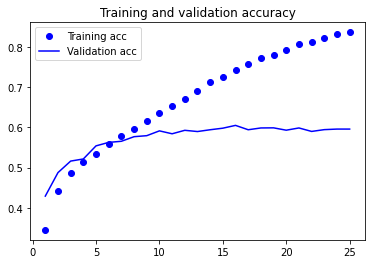

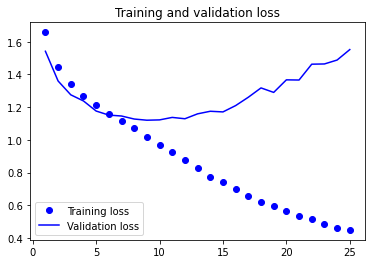

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('gdrive/My Drive/reduce_layers_1.png', dpi=100)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('gdrive/My Drive/reduce_layers_2.png', dpi=100)
plt.show()